$\Huge\bf \text{DataDay 2025}$
<h3> Som príliš často na sociálnej sieti, čo hovoria dáta? </h3>
<h4> doc. Mgr. Jozef Kiseľák, PhD., Bc. Sophia Petra Krišáková, Mgr. Miloslav Cisko </h4>

Svoje facebookove údaje si môžte stiahnuť na linku: https://www.facebook.com/dyi/?referrer=yfi_settings
Alebo použite súbor **liked_posts.json** z GitHubu:   
https://github.com/sophipeta-kaa/DataDay25


# Načítanie knižníc (modulov)

Najprv si načítame knižnice (moduly), ktoré budeme využívať.

Medzi najzákladnejšie patrí knižnica **Pandas**, ktorá slúži na manipuláciu s dátami a ich analýzu. Na ďalšie operácie s dátovými štruktúrami nám bude slúžiť aj knižnica **NumPy**.

Ďalšími podstatnými knižnicami, ktoré využijeme sú knižnice **Seaborn** a **Matplotlib**, ktoré nám poslúžia na vizualizáciu našich údajov.

<h4> Importy </h4>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

# Načítanie údajov

Knižnica **Pandas** obsahuje užitočnú dátovu štruktúru DataFrame, do ktorej si načítame naše údaje.

**DataFrame**, alebo dátový rámec je štruktúra, ktorá je určená najmä pre tabuľkové údaje a vďaka nej vieme efektívne pracovať aj s veľkými súbormi.

In [2]:
# Načítanie JSON zo súboru
with open("liked_posts.json", "r", encoding="utf-8") as file:
    data = json.load(file)

# Extrahovanie údajov do zoznamu
rows = []
for item in data["likes_media_likes"]:
    title = item["title"]
    for entry in item["string_list_data"]:
        rows.append({
            "title": title,
            "href": entry["href"],
            "value": entry["value"],
            "timestamp": entry["timestamp"]
        })

# Vytvorenie DataFrame
df = pd.DataFrame(rows)

Funkcia .head() nám poskytne náhľad do našich údajov. Bez dodatočných argumentov nám vypíše prvých 5 riadkov DataFrame-u. Ak by sme chceli vypísať viac, alebo menej riadkov, stačí požadovaný počet riadkov zadať do zátvoriek.

In [3]:
df.head()
# df.head(3)

,title,href,value,timestamp
0,vêsl._na,https://www.instagram.com/p/DDcGniiqzeu/,ð,1733928519
1,sløv_án.ka,https://www.instagram.com/p/DDbuCqogWbF/,ð,1733910237
2,per._un.va,https://www.instagram.com/reel/DDPVfbKNSZn/,ð,1733904660
3,lad.mîr._a,https://www.instagram.com/p/DDaNSdRNcU7/,ð,1733866661
4,mokõsha_._,https://www.instagram.com/reel/DDZ4tQKoy4X/,ð,1733861288


In [4]:
print(f'Rozmery nášho DataFrame-u (počet riadkov, počet stĺpcov): {df.shape}')

Rozmery nášho DataFrame-u (počet riadkov, počet stĺpcov): (36, 4)


# Spracovanie údajov

In [5]:
#Pre jednoduchosť si premenujeme stĺpec s časovou pečiatkou "timestamp" na názov "date".
df.rename(columns={'timestamp': 'date'}, inplace=True)
df

,title,href,value,date
0,vêsl._na,https://www.instagram.com/p/DDcGniiqzeu/,ð,1733928519
1,sløv_án.ka,https://www.instagram.com/p/DDbuCqogWbF/,ð,1733910237
2,per._un.va,https://www.instagram.com/reel/DDPVfbKNSZn/,ð,1733904660
3,lad.mîr._a,https://www.instagram.com/p/DDaNSdRNcU7/,ð,1733866661
4,mokõsha_._,https://www.instagram.com/reel/DDZ4tQKoy4X/,ð,1733861288
5,_rûn.vech,https://www.instagram.com/reel/DDAWnO9qIT2/,ð,1733842759
6,düb._mîla,https://www.instagram.com/p/DDZskEaIigh/,ð,1733842745
7,j.azm_hmla,https://www.instagram.com/reel/DBp_bprMT-R/,ð,1733842675
8,vêt_rnic.a,https://www.instagram.com/reel/DA51Tm7usrj/,ð,1733821724
9,les._a.mêl,https://www.instagram.com/reel/DCzZOCsxG-y/,ð,1733782511


In [6]:
#Niektoré zo stĺpcov v DataFrame nebudeme potrebovať, čiže ich môžme "zahodiť".
df = df.drop(['href', 'value'], axis=1)
df

,title,date
0,vêsl._na,1733928519
1,sløv_án.ka,1733910237
2,per._un.va,1733904660
3,lad.mîr._a,1733866661
4,mokõsha_._,1733861288
5,_rûn.vech,1733842759
6,düb._mîla,1733842745
7,j.azm_hmla,1733842675
8,vêt_rnic.a,1733821724
9,les._a.mêl,1733782511


In [7]:
df['date'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S')).dtype


dtype('O')

In [8]:
df['date'] = pd.to_datetime(df['date'], unit='s')

In [9]:
df['date'].dtype

dtype('<M8[ns]')

In [10]:
df

,title,date
0,vêsl._na,2024-12-11 14:48:39
1,sløv_án.ka,2024-12-11 09:43:57
2,per._un.va,2024-12-11 08:11:00
3,lad.mîr._a,2024-12-10 21:37:41
4,mokõsha_._,2024-12-10 20:08:08
5,_rûn.vech,2024-12-10 14:59:19
6,düb._mîla,2024-12-10 14:59:05
7,j.azm_hmla,2024-12-10 14:57:55
8,vêt_rnic.a,2024-12-10 09:08:44
9,les._a.mêl,2024-12-09 22:15:11


In [11]:
df.columns

Index(['title', 'date'], dtype='object')

In [12]:
print(f'Rozmery nášho DataFrame-u (počet riadkov, počet stĺpcov), po vymazaní stĺpcov: {df.shape}')

Rozmery nášho DataFrame-u (počet riadkov, počet stĺpcov), po vymazaní stĺpcov: (36, 2)


Podobne ako u funkcie .head(), ktorá nám vypísala počiatočné riadky, nám funkcia .tail() vypíše koncové riadky.

In [13]:
df.tail()

,title,date
31,múd.řêc.__,2024-12-06 19:13:40
32,skrîptø_._na,2024-12-06 19:12:13
33,hml._vêdôm,2024-12-05 20:58:05
34,akâd._shadø,2024-12-05 12:33:08
35,študîâ._nova,2024-12-05 12:32:59


In [14]:
#Nastavíme si v DataFrame ako hlavný index dátum.
df.set_index('date',inplace=True)

In [15]:
df.columns
#print("Available columns:", df.columns.tolist())
df

,title
date,
2024-12-11 14:48:39,vêsl._na
2024-12-11 09:43:57,sløv_án.ka
2024-12-11 08:11:00,per._un.va
2024-12-10 21:37:41,lad.mîr._a
2024-12-10 20:08:08,mokõsha_._
2024-12-10 14:59:19,_rûn.vech
2024-12-10 14:59:05,düb._mîla
2024-12-10 14:57:55,j.azm_hmla
2024-12-10 09:08:44,vêt_rnic.a


# Trochu matematiky

Ak premenná $X$ môže nadobúdať hodnotu $x_i\in \{kat_2,\dots,kat_p\}$ nazýva sa  

**kvalitatívna (kategoriálna)** -  popisujú vlastnosti štatistickej jednotky slovne a nemusia sa dať jednoznačne merať; v závislosti na tom, či tieto hodnoty vieme usporiadať takéto premenné ešte delíme na:

* **nominálna** - jednotlivé kategórie síce vieme pomenovať, ale nie usporiadať; nedajú sa robiť žiadne matematické operácie okrem určovania početností; napr. farba očí, značka auta, ...
* **ordinálna** - jednotlivé kategórie vieme aj pomenovať aj usporiadať; ani tu však nemožno robiť matematické operácie. Napr. počet valcov motora auta, kategórie odpovedí: určite áno - skôr áno - skôr nie - určite nie.    

Dáta získané napr. pri náhodnom výbere chceme redukovať, zhrnúť do niekoľkých číselných charakteristík, ktoré nazývame štatistiky. Zvyčajne máme iba konečne veľa hodnôt.

*    **Absolútna početnosť** $~~n_i$ udáva, koľkokrát sa príslušná hodnota (znak) ${x_i}$ v súbore
*   **Relatívna početnosť (frekvencia)** $~~f_i=\frac{n_i}{N}=\frac{n_i}{\sum_{i=1}^kn_i}$ je pomer absolútnej početnosti a celkového počtu pozorovaní vo výbere - početnosť relatívna vzhľadom k celkovému počtu prvkov výberu.
* **POZOR !** - percentuálne vyjadrenie nemusí priamo implikovať relatívnu početnosť.
* Nech $x_1,\dots,x_n\in\mathbb{R}$. Hovoríme, že premenná $X$ má **empirické
rozdelenie pravdepodobnosti** určené týmito dátami, ak je to diskrétna náhodná premenná a $P[X=x_i]=\frac{n_i}{N}=f_i$.
*  **Pravdepodobnosť** teda intuitívne chápeme ako relatívnu početnosť pri veľkom počte (opakovaných) pokusov.
* **Histogram** je grafické znázornenie rozdelenia dát pomocou stĺpcov (nie nutne) rovnakej šírky po sebe nasledujúcich intervalov - tried, pričom výška stĺpcov vyjadruje početnosť sledovanej veličiny (v danom intervale - triede).
*  **POZOR !** -  Stĺpce v histograme nie je možné preskupiť.
* Pre ordinálne dáta, nie je vhodné hovoriť o histograme ale iba o stĺpcovom grafe.

![An image](https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/screenshot-2021-03-01-at-9-17-06-am-1614570481.png)

# Početnosti v praxi

V nasledujúcej bunke sa naše údaje - teda interakcie na sociálnej sieti, rozdelia do skupiniek po dňoch v týždni, v ktorých sa odohrali. Stĺpec "date" teraz nebude obsahovať informácie vo formáte YYYY-MM-DD HH:MM:SS, ale už len YYYY-MM-01, keďže sme nerozlišovali deň, v ktorých boli dané posty vytvorené.

Funkcia .size() nám uloží do stĺpca "data" počet príspevkov, ktoré boli v danom mesiaci daného roka vytvorené.

In [16]:
like_counts=df.resample('D').size()  #For 'MS' the dates of the groups are always the first of the month, for 'M' the last day.
#post_means=post_counts.resample('YS').mean(numeric_only=True)

Ukážka novozískaných údajov:

In [17]:
like_counts

,0
date,
2024-12-05,3
2024-12-06,3
2024-12-07,6
2024-12-08,5
2024-12-09,10
2024-12-10,6
2024-12-11,3


V ďalšom kroku si vyberieme nejaký počiatočný a koncový dátum, pre ktoré si z DataFrame-u o počte príspevkov za jednotlivé dni zoberieme podmnožinu údajov pre vizualizáciu.

In [18]:
start_date = '2024-12-04'
end_date   = '2024-12-12'
#Nasledujúci príkaz šikovne zoberie len tie riadky, ktoré budú v nami zadanom rozsahu dátumov.
df2 = df.query('date >= @start_date and date <= @end_date')
df2

,title
date,
2024-12-11 14:48:39,vêsl._na
2024-12-11 09:43:57,sløv_án.ka
2024-12-11 08:11:00,per._un.va
2024-12-10 21:37:41,lad.mîr._a
2024-12-10 20:08:08,mokõsha_._
2024-12-10 14:59:19,_rûn.vech
2024-12-10 14:59:05,düb._mîla
2024-12-10 14:57:55,j.azm_hmla
2024-12-10 09:08:44,vêt_rnic.a


<h4> Vizualizácia </h4>

In [19]:
#Nastavenie predvolenej veľkosti grafu a veľkosti písma.
sns.set(rc={'figure.figsize':(10,6)})
sns.set(font_scale=1)

In [20]:
#Na os x budeme chcieť jednotlivé dátumy - vložínme si teda tento stĺpec do premennej x_labels.
x_labels = like_counts.index
x_labels

DatetimeIndex(['2024-12-05', '2024-12-06', '2024-12-07', '2024-12-08',
               '2024-12-09', '2024-12-10', '2024-12-11'],
              dtype='datetime64[ns]', name='date', freq='D')

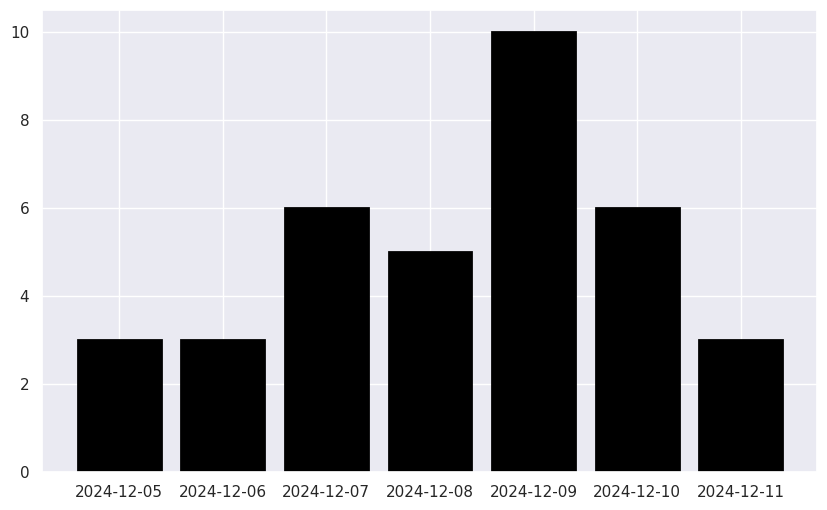

In [21]:
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x_labels,like_counts,color = "black",edgecolor = "black", linewidth = 2)
plt.show()

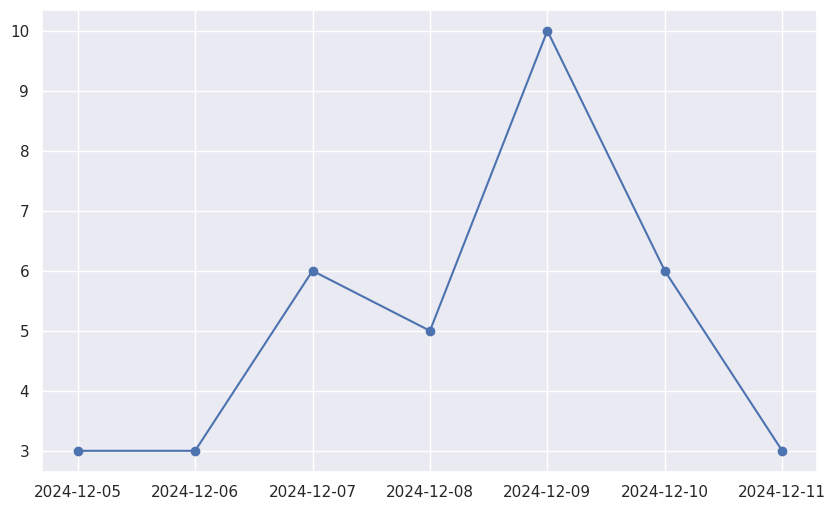

In [22]:
plt.plot(like_counts, marker='o')
plt.show()

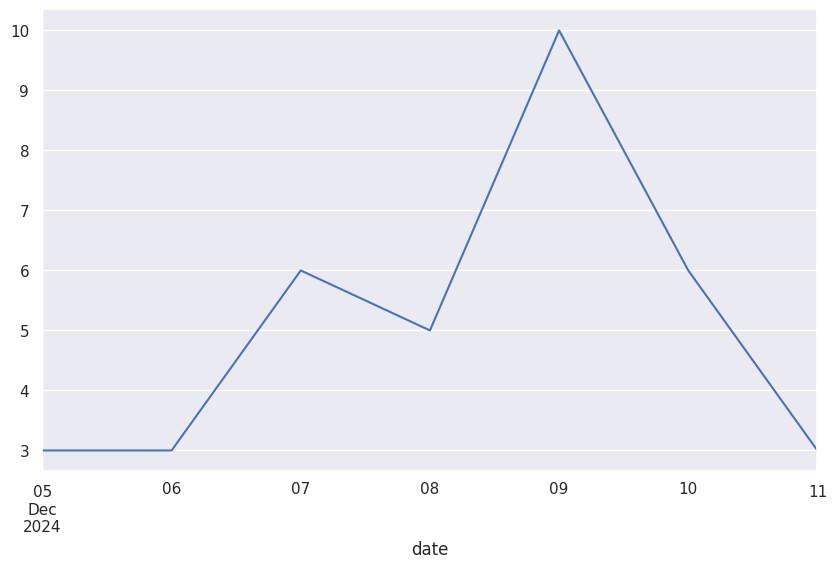

In [23]:
ax = like_counts.plot(x='Date', y='Number of posts')
plt.show()

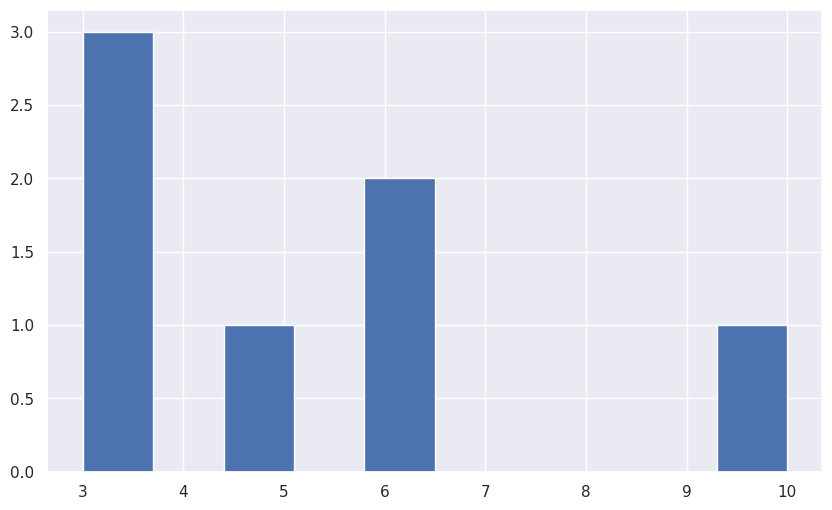

In [24]:
like_counts.hist()
plt.show()

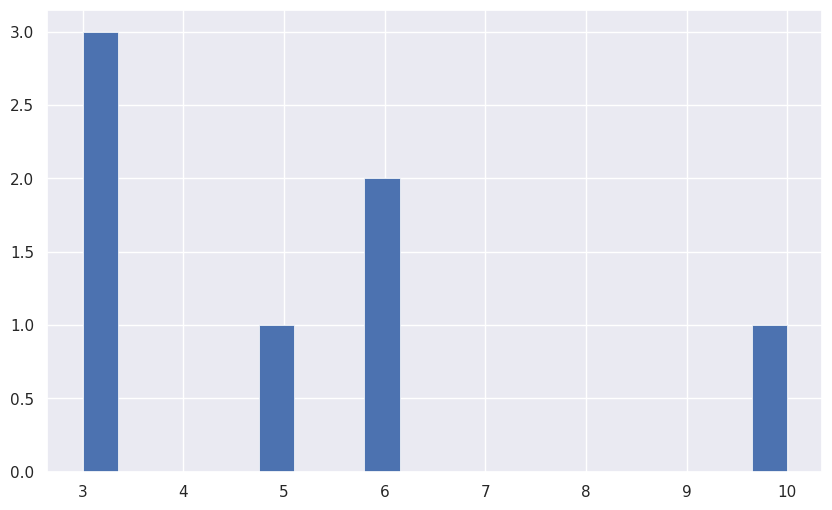

In [25]:
plt.hist(like_counts, bins=20, linewidth=0.5, edgecolor="white")
plt.show()

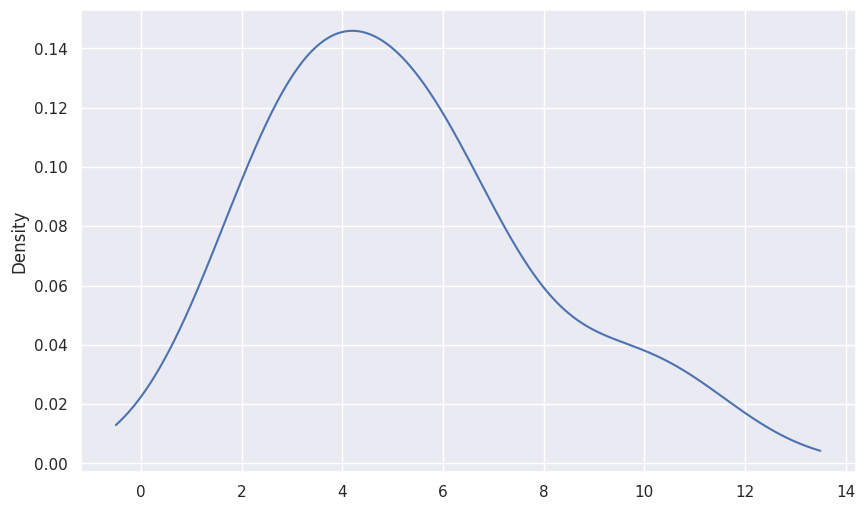

In [26]:
like_counts.plot(kind='kde')
plt.show()



```
# Toto je naformátováno jako kód
```

# "More advanced veci"

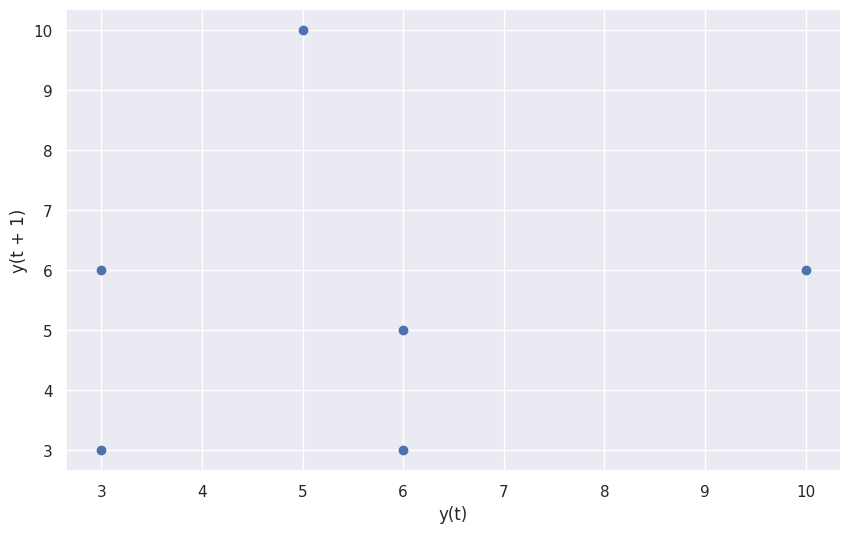

In [27]:
#More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship.
#A ball in the middle or a spread across the plot suggests a weak or no relationship.
pd.plotting.lag_plot(like_counts, lag=1)
plt.show()

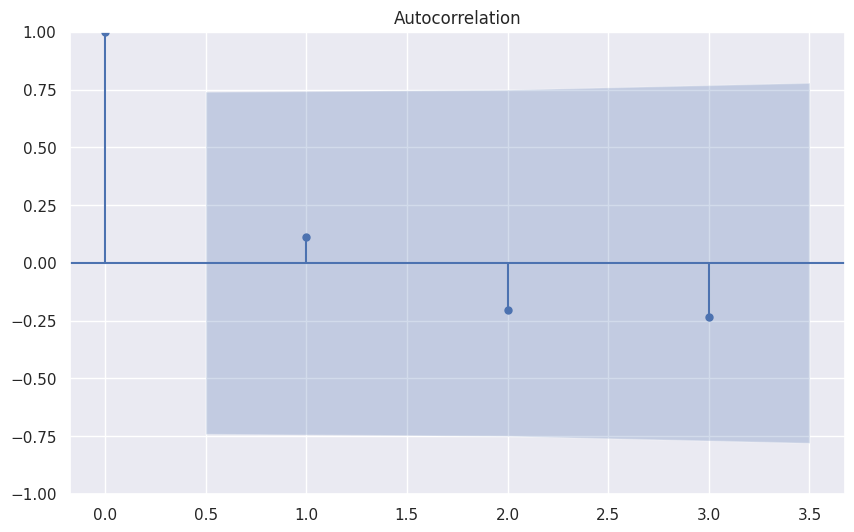

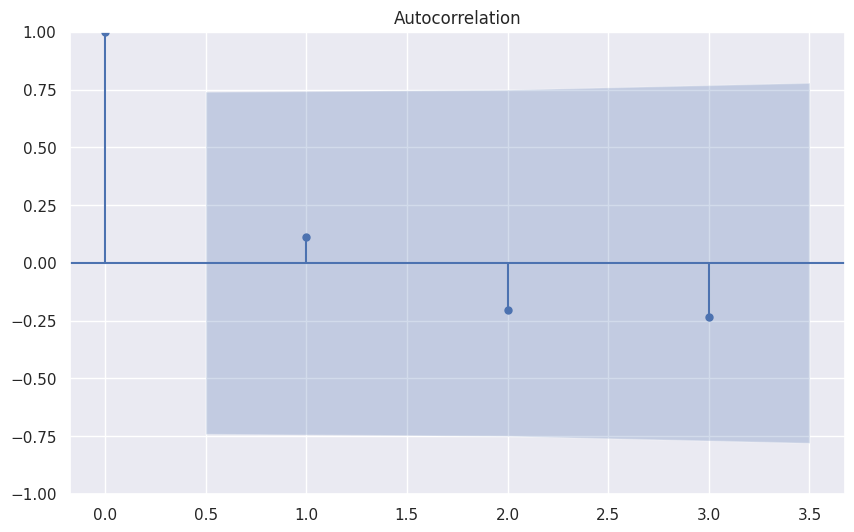

In [ ]:
plot_acf(like_counts)

In [ ]:
split = round(len(like_counts) / 2)
X1, X2 = like_counts[0:split], like_counts[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=4.250000, mean2=6.333333
variance1=2.250000, variance2=12.333333


In [ ]:
result = adfuller(like_counts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('used lag: %f' % result[2])
print('num. of obs.: %f' % result[3])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

print('The maximized information criterion if autolag is not None: %f' % result[5])

ADF Statistic: -1.800901
p-value: 0.380015
used lag: 0.000000
num. of obs.: 6.000000
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901
The maximized information criterion if autolag is not None: 26.312912


<h2> Zdroje: </h2>

Pôvodný Jupyter notebook FCBOOK.ipynb: https://colab.research.google.com/drive/1b355atUOd8xm6QbwfP6jkVQAmJoewIhZ